In [1]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("employees.csv")

print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)
display(df.head())

   Emp ID Name Prefix First Name Middle Initial Last Name Gender  \
0  677509        Drs.       Lois              H    Walker      F   
1  940761         Ms.     Brenda              S  Robinson      F   
2  428945         Dr.        Joe              W  Robinson      M   
3  408351        Drs.      Diane              I     Evans      F   
4  193819         Mr.   Benjamin              R   Russell      M   

                         E Mail     Father's Name       Mother's Name  \
0       lois.walker@hotmail.com     Donald Walker        Helen Walker   
1     brenda.robinson@gmail.com  Raymond Robinson       Judy Robinson   
2        joe.robinson@gmail.com    Scott Robinson  Stephanie Robinson   
3         diane.evans@yahoo.com       Jason Evans      Michelle Evans   
4  benjamin.russell@charter.net   Gregory Russell   Elizabeth Russell   

  Mother's Maiden Name  Salary  
0                Lewis  168251  
1                Perry   51063  
2               Taylor   50155  
3                All

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Salary
0,677509,Drs.,Lois,H,Walker,F,lois.walker@hotmail.com,Donald Walker,Helen Walker,Lewis,168251
1,940761,Ms.,Brenda,S,Robinson,F,brenda.robinson@gmail.com,Raymond Robinson,Judy Robinson,Perry,51063
2,428945,Dr.,Joe,W,Robinson,M,joe.robinson@gmail.com,Scott Robinson,Stephanie Robinson,Taylor,50155
3,408351,Drs.,Diane,I,Evans,F,diane.evans@yahoo.com,Jason Evans,Michelle Evans,Allen,180294
4,193819,Mr.,Benjamin,R,Russell,M,benjamin.russell@charter.net,Gregory Russell,Elizabeth Russell,Nelson,117642


In [2]:
# Clean column names: lowercase, strip, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert salary to numeric (remove non-numeric if any)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Standadize email
df['e_mail'] = df['e_mail'].str.strip().str.lower()

# Remove extra spaces in names
df['first_name'] = df['first_name'].str.strip()
df['last_name'] = df['last_name'].str.strip()
df['name_prefix'] = df['name_prefix'].str.strip()
df['middle_initial'] = df['middle_initial'].str.strip()

# Fill or drop missing data
df = df.dropna(subset=['emp_id', 'first_name', 'last_name', 'salary'])

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Preview cleaned data
display(df.head())

,emp_id,name_prefix,first_name,middle_initial,last_name,gender,e_mail,father's_name,mother's_name,mother's_maiden_name,salary
0,677509,Drs.,Lois,H,Walker,F,lois.walker@hotmail.com,Donald Walker,Helen Walker,Lewis,168251
1,940761,Ms.,Brenda,S,Robinson,F,brenda.robinson@gmail.com,Raymond Robinson,Judy Robinson,Perry,51063
2,428945,Dr.,Joe,W,Robinson,M,joe.robinson@gmail.com,Scott Robinson,Stephanie Robinson,Taylor,50155
3,408351,Drs.,Diane,I,Evans,F,diane.evans@yahoo.com,Jason Evans,Michelle Evans,Allen,180294
4,193819,Mr.,Benjamin,R,Russell,M,benjamin.russell@charter.net,Gregory Russell,Elizabeth Russell,Nelson,117642


In [3]:
# Basic stats
display(df.describe())

# Value counts by department or gender
display(df['gender'].value_counts())

# Top 5 highest-paid employees
display(df.sort_values(by='salary', ascending=False).head())

,emp_id,salary
count,100.00000,100.000000
mean,547652.10000,119738.090000
std,257664.16679,46185.278194
min,134841.00000,42005.000000
25%,328643.75000,83979.750000
50%,497414.00000,118049.500000
75%,766040.00000,162509.250000
max,979607.00000,197537.000000


gender
F    60
M    40
Name: count, dtype: int64

,emp_id,name_prefix,first_name,middle_initial,last_name,gender,e_mail,father's_name,mother's_name,mother's_maiden_name,salary
17,214352,Ms.,Theresa,G,Lee,F,theresa.lee@gmail.com,John Lee,Rebecca Lee,Turner,197537
65,917395,Hon.,Christopher,D,Nelson,M,christopher.nelson@aol.com,Jeffrey Nelson,Cynthia Nelson,Sanders,190765
55,253573,Ms.,Sharon,E,Lopez,F,sharon.lopez@gmail.com,Daniel Lopez,Susan Lopez,Hayes,190139
42,265813,Hon.,Jack,E,Campbell,M,jack.campbell@gmail.com,Philip Campbell,Wanda Campbell,Watson,186280
71,478003,Hon.,Cynthia,X,White,F,cynthia.white@gmail.com,Nicholas White,Katherine White,Turner,186200


In [4]:
# Full name
df['full_name'] = df['first_name'] + ' ' + df['last_name']

# Salary in thousands
df['salary_k'] = df['salary'] / 1000

In [5]:
df.to_csv("Cleaned_employees.csv", index=False)

/home/cyber/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


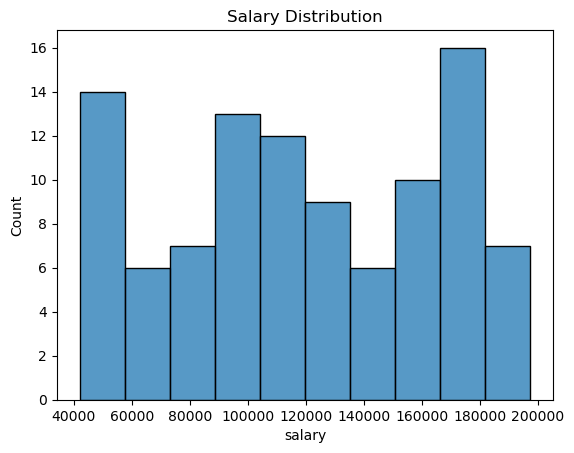

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Salary distribution
sns.histplot(df['salary'], bins=10)
plt.title("Salary Distribution")
plt.show()